In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [2]:
df=pd.read_csv("water_pre.csv")

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [61]:
print(df.isnull().sum())
df.fillna(df.median(numeric_only=True), inplace=True)
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [9]:
corr = df.corr()
fig_corr = px.imshow(
    corr,
    text_auto=True,
    color_continuous_scale="RdBu_r",
    title="Correlation Heatmap of All Features"
)
fig_corr.show()


In [10]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [11]:
# Potability Class Distribution
fig_class = px.histogram(
    df, 
    x="Potability", 
    color="Potability",
    color_discrete_sequence=["#E74C3C", "#27AE60"],
    title="Potability Class Distribution (0 = Non-Potable, 1 = Potable)",
)
fig_class.update_xaxes(tickvals=[0, 1])
fig_class.show()

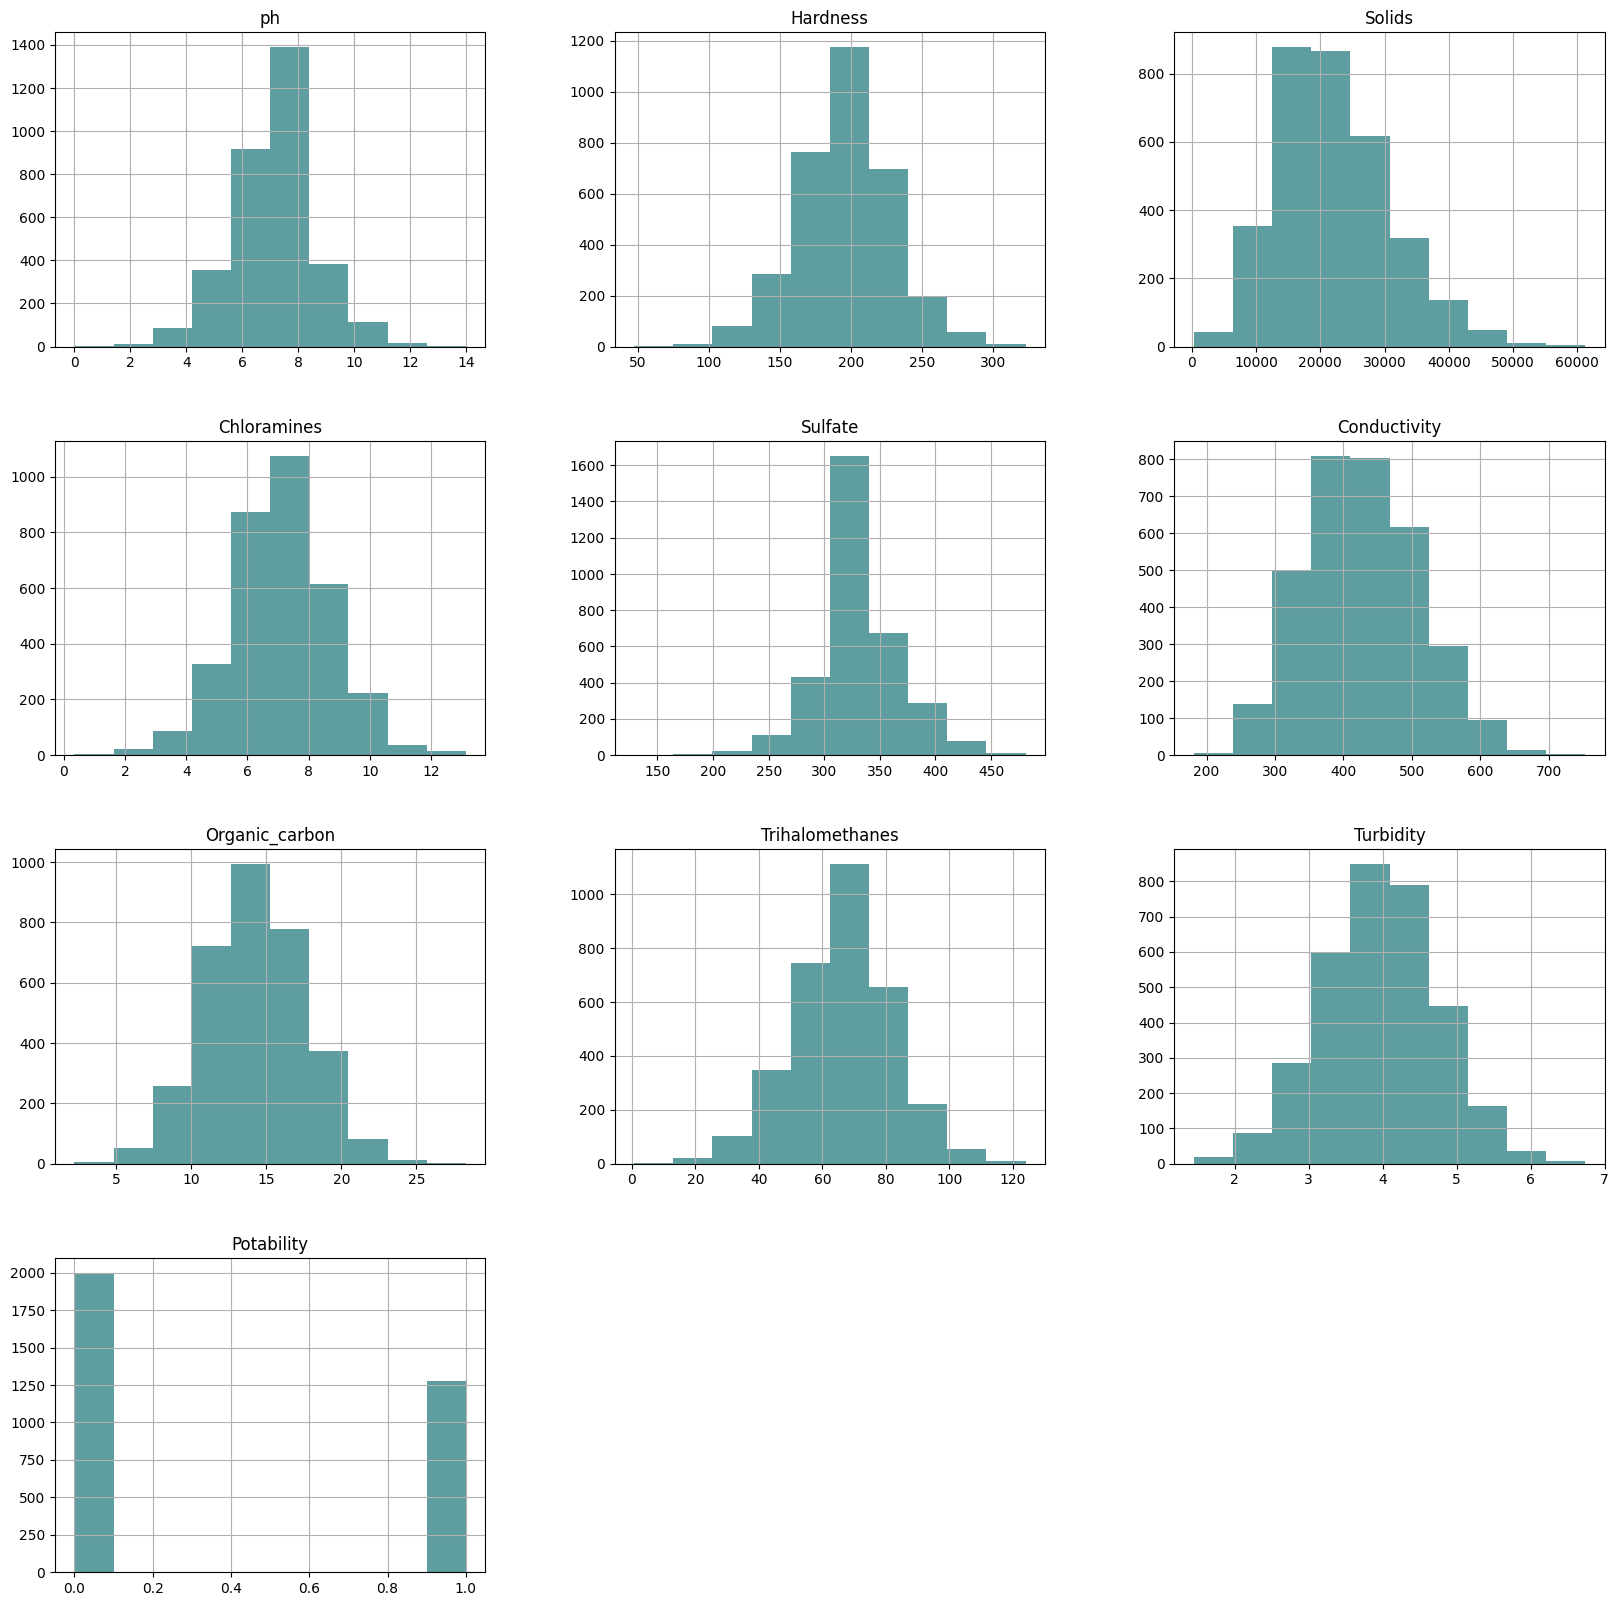

In [12]:
data_hist=df.hist(figsize=(20,20),color="#5F9EA0")

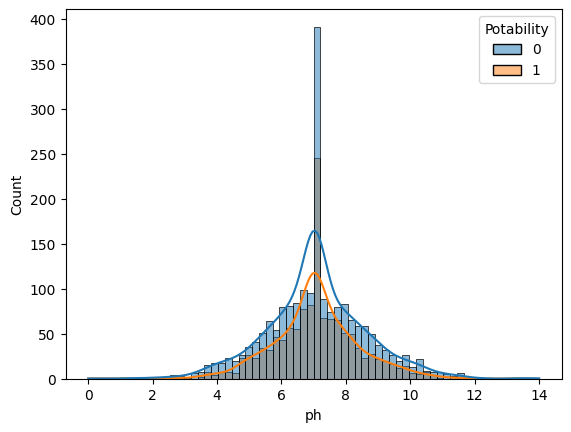

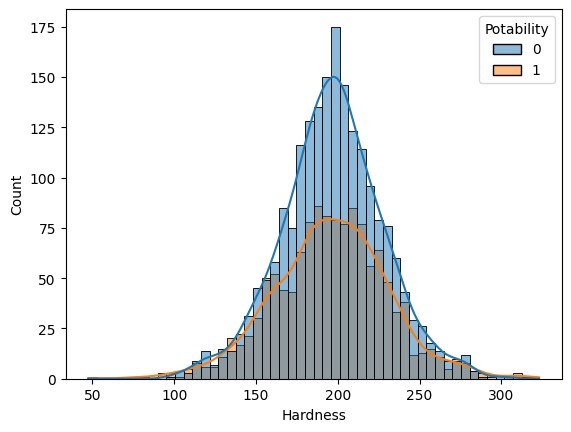

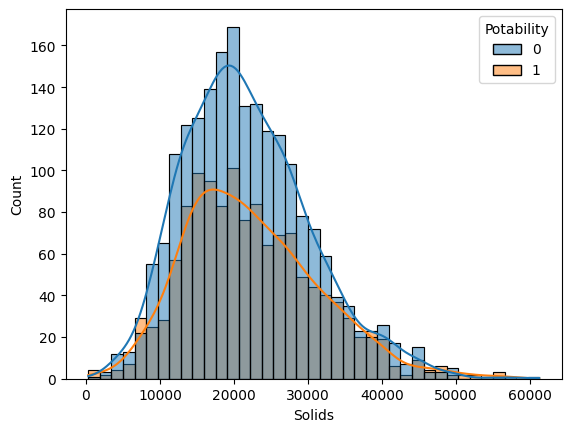

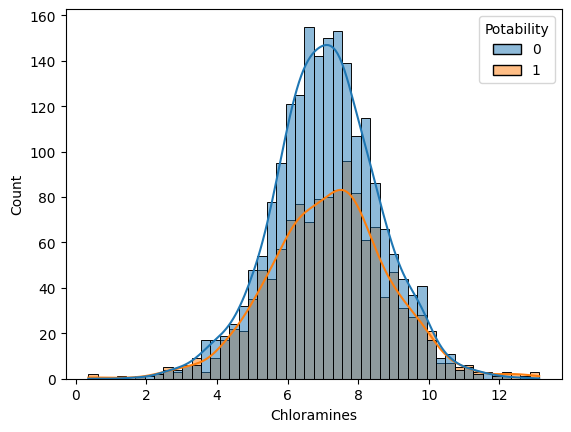

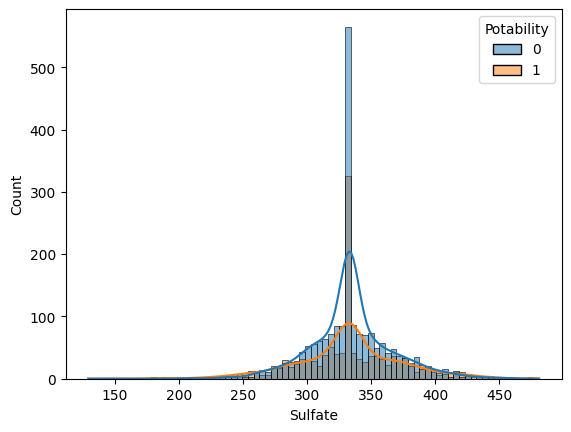

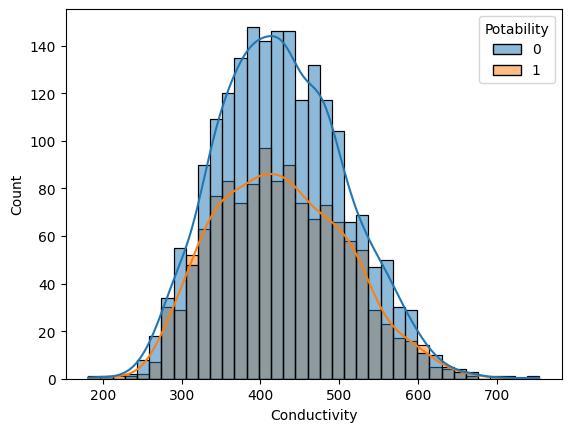

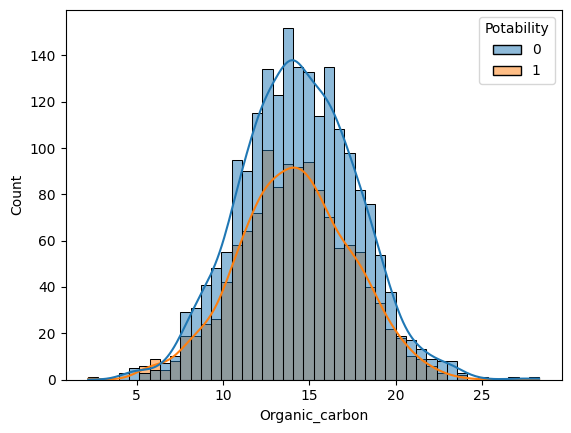

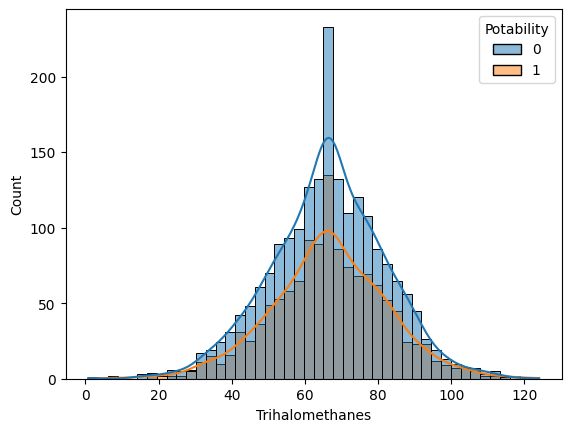

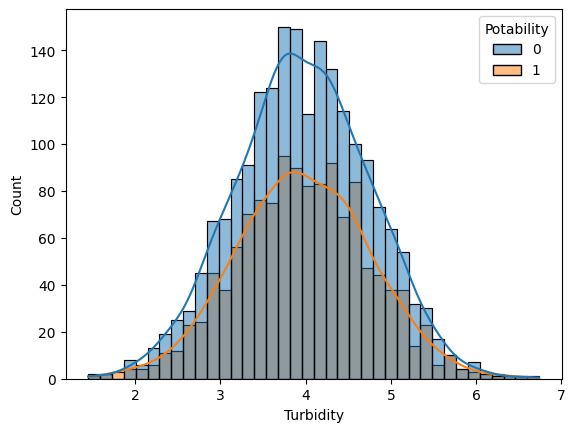

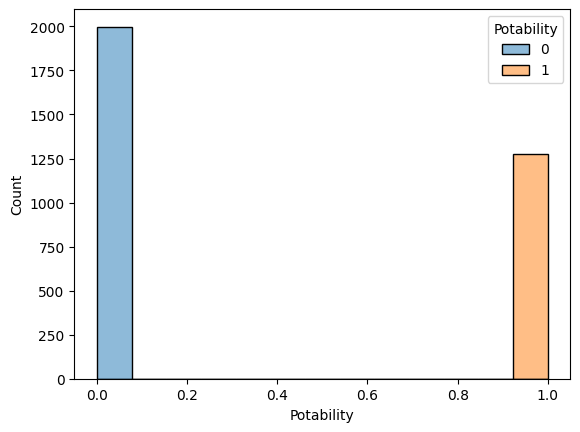

In [13]:
for col in df.columns:
    sns.histplot(data=df,x=col,kde=True,hue='Potability')
    plt.show()

In [14]:
df.groupby('Potability').mean().T

Potability,0,1
ph,7.077736,7.068655
Hardness,196.733292,195.800744
Solids,21777.490788,22383.991018
Chloramines,7.092175,7.169338
Sulfate,334.200184,332.683125
Conductivity,426.730454,425.383800
Organic_carbon,14.364335,14.160893
Trihalomethanes,66.320635,66.543247
Turbidity,3.965800,3.968328


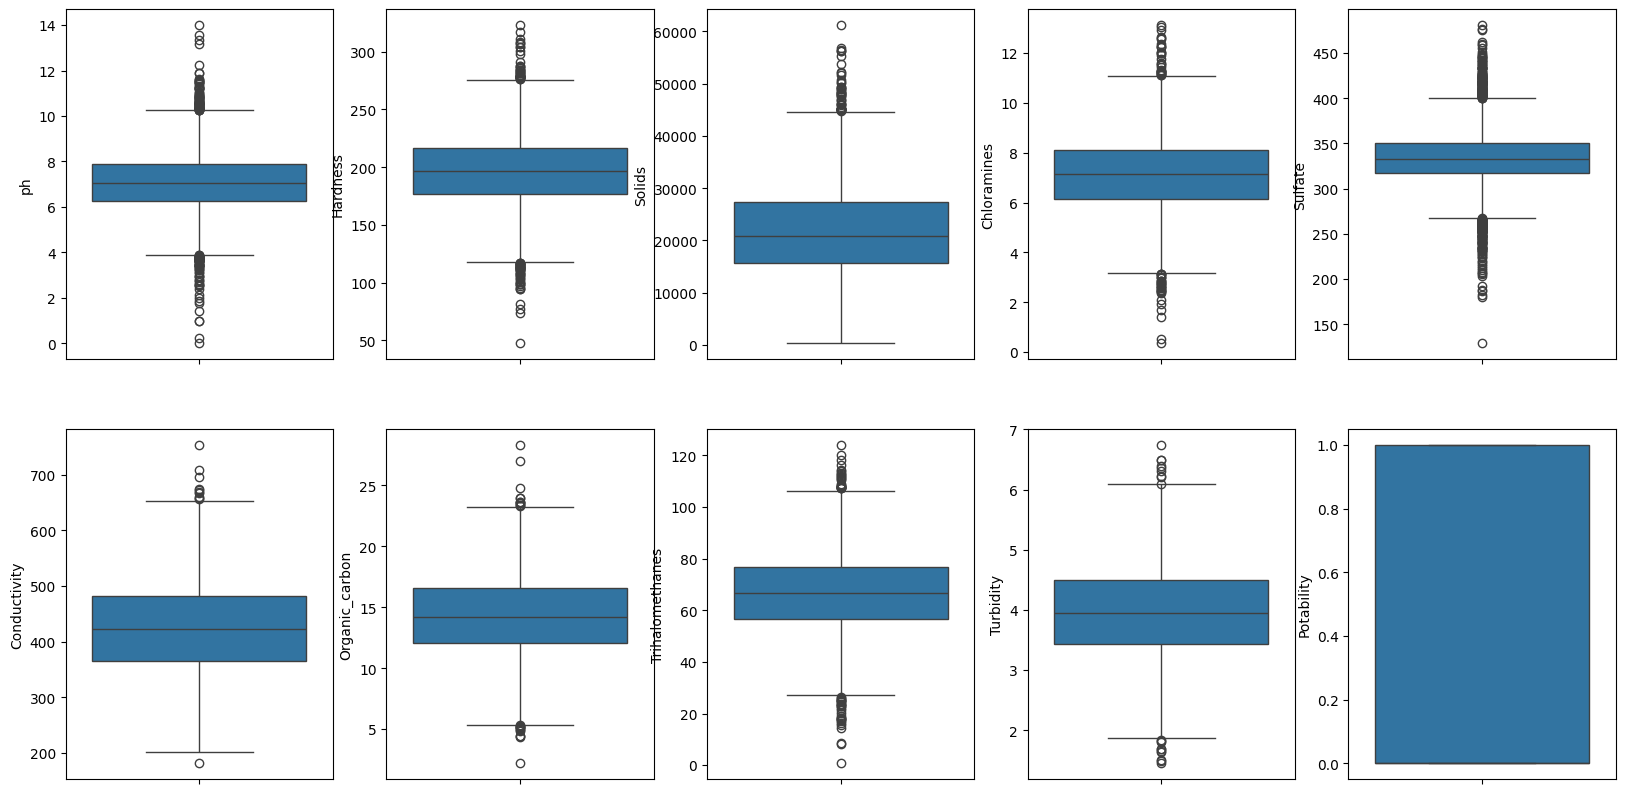

In [15]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
ax = ax.flatten()
for index, (col, values) in enumerate(df.items()):
    sns.boxplot(y=col, data=df, ax=ax[index])
    index +=1

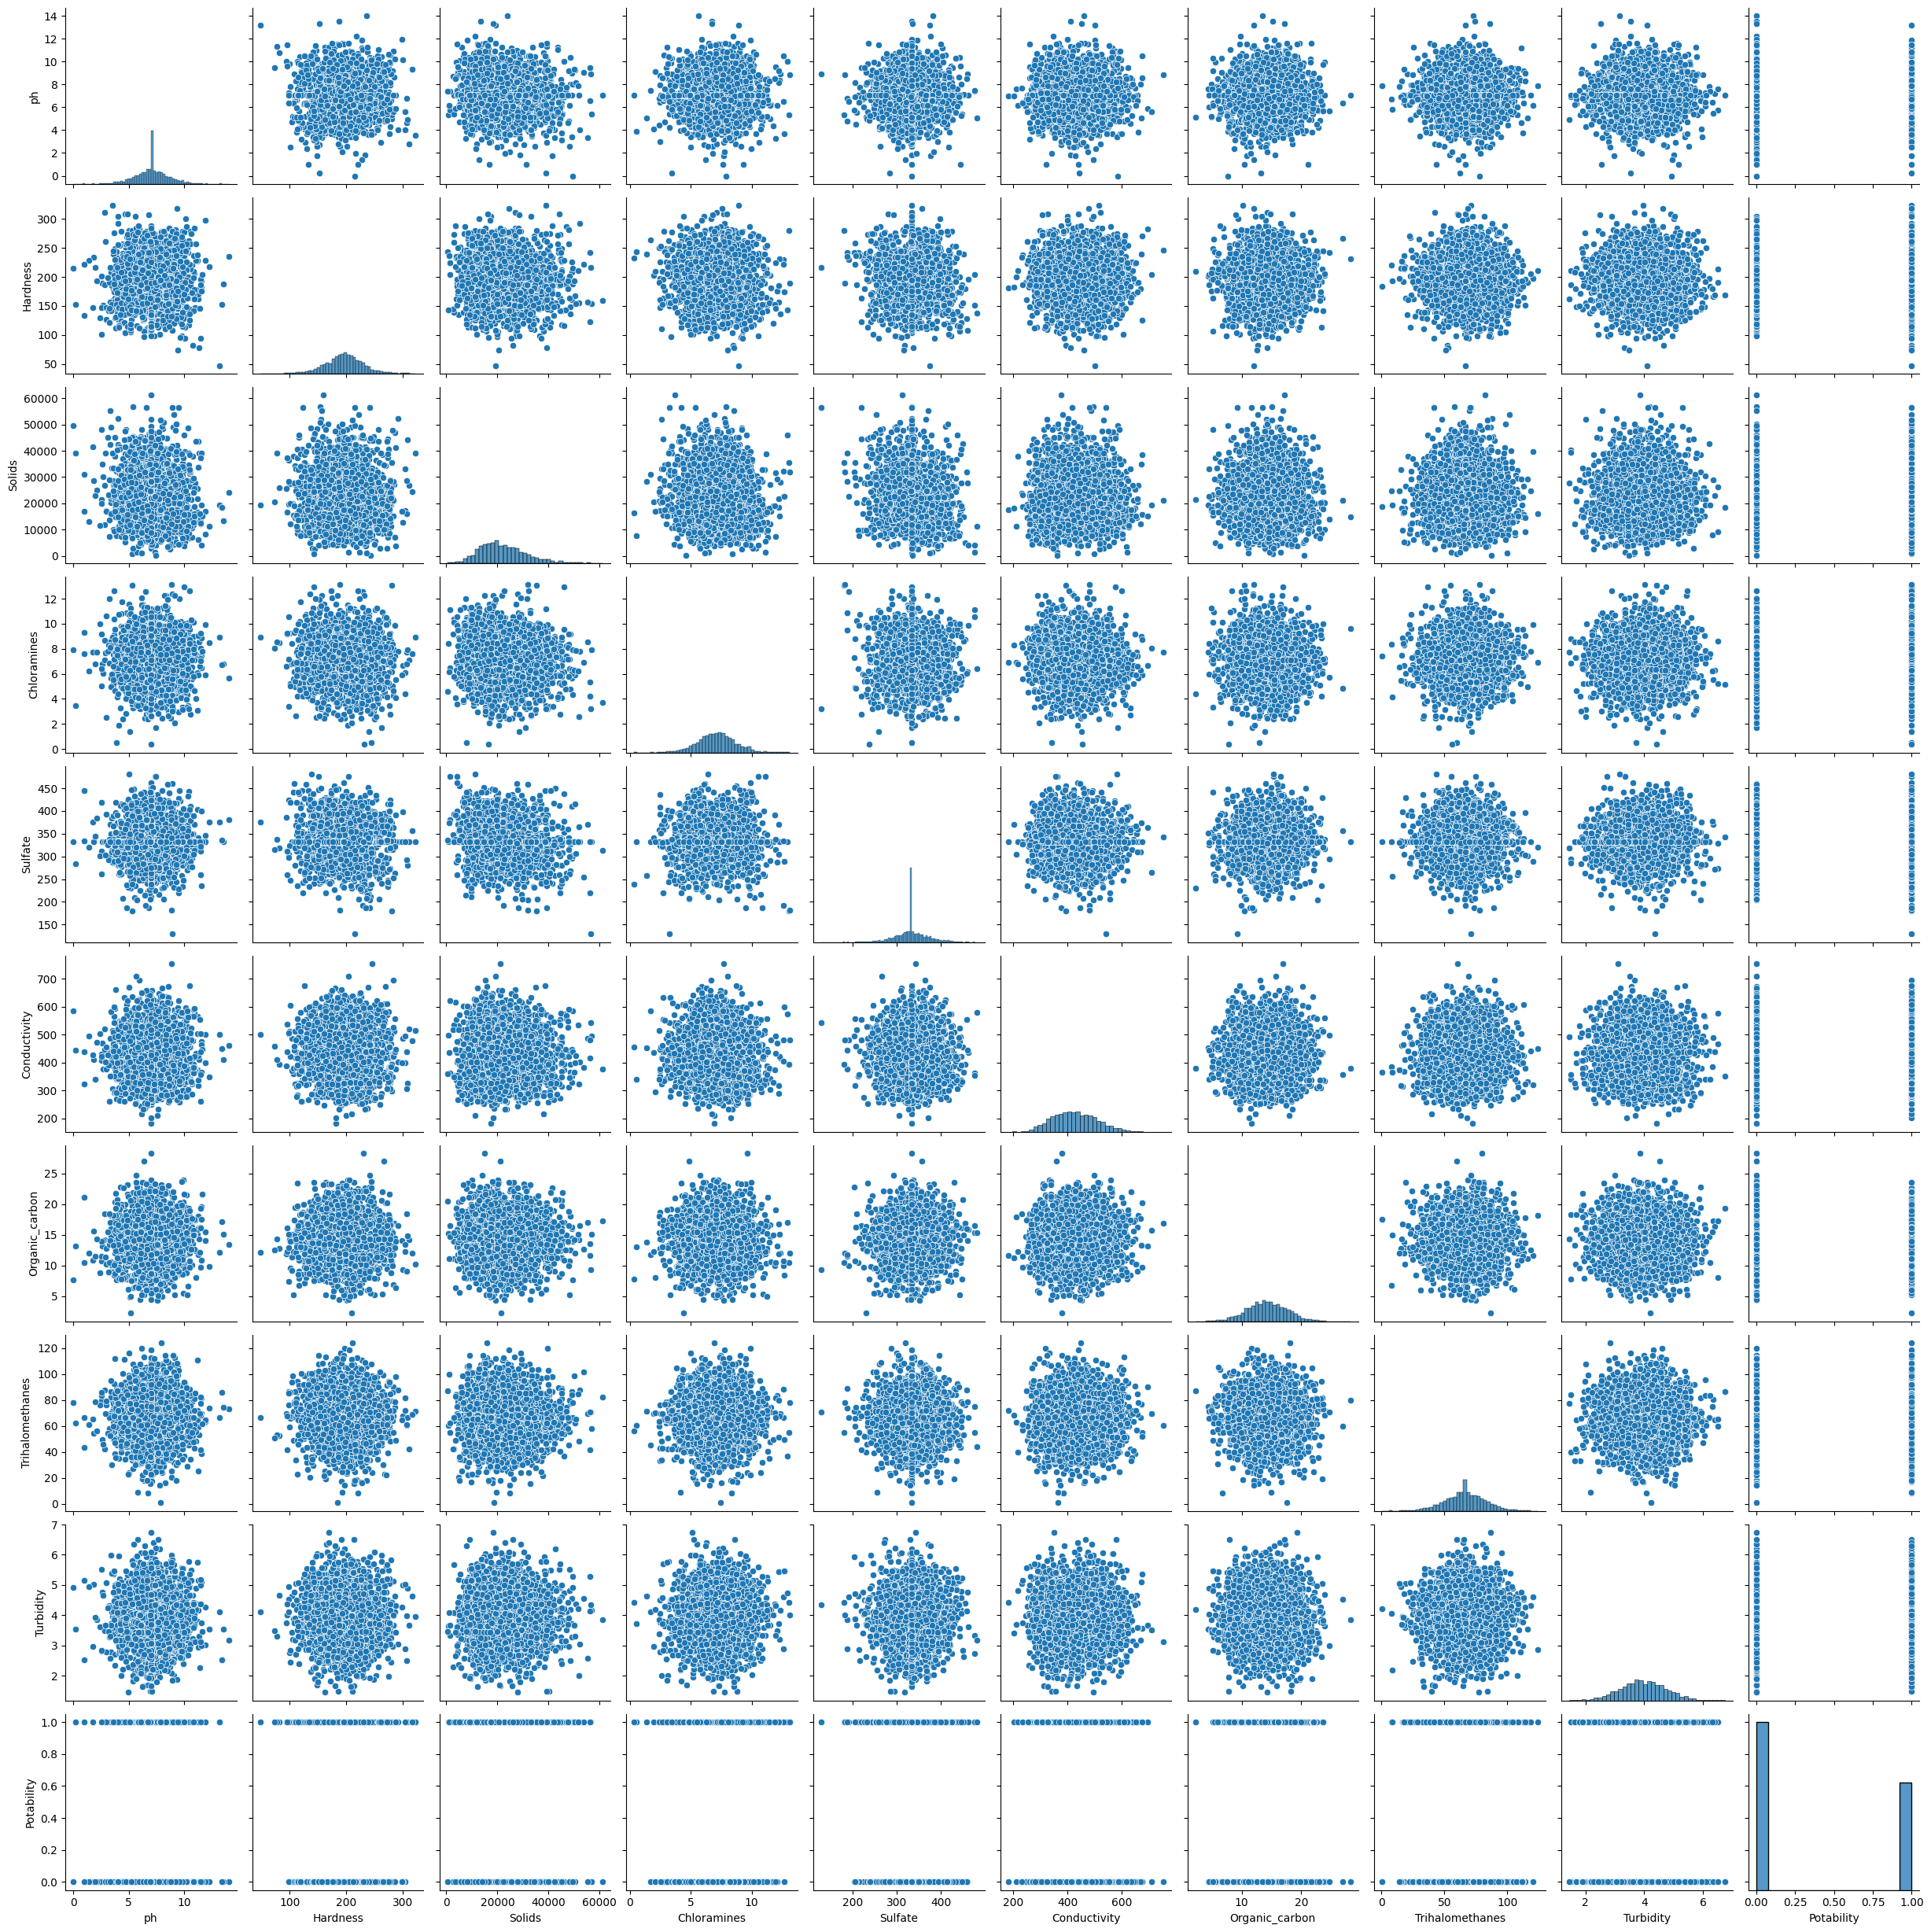

In [16]:
sns.pairplot(df)

In [17]:
fig=px.pie(df,names='Potability',hole=0.4,template="plotly_dark")
fig.show()

In [18]:
fig=px.scatter(df,x='ph',y='Sulfate',color='Potability',template="plotly_dark")
fig.show()


In [19]:
fig=px.scatter(df,x='Organic_carbon',y='Sulfate',color='Potability',template="plotly_dark")
fig.show()


In [20]:
fig_3d = px.scatter_3d(
    df,
    x="ph",
    y="Conductivity",
    z="Turbidity",
    color="Potability",
    color_discrete_sequence=["#E74C3C", "#27AE60"],
    size="Solids",
    title="3D Relationship: pH, Conductivity, and Turbidity"
)
fig_3d.show()


In [21]:
corr_with_target = df.corr()["Potability"].drop("Potability").sort_values(ascending=False)
fig_bar = px.bar(
    x=corr_with_target.values,
    y=corr_with_target.index,
    orientation="h",
    color=corr_with_target.values,
    color_continuous_scale="viridis",
    title="Correlation of Features with Potability",
    labels={"x": "Correlation", "y": "Feature"}
)
fig_bar.show()

In [22]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [23]:
x=df.drop("Potability",axis=1)
y=df["Potability"]

In [24]:
x.shape,y.shape

((3276, 9), (3276,))

In [ ]:
# Models and Train Data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier


In [26]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-2.54735465e-02,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30543373e+00, -1.28629758e+00],
       [-2.28471739e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.39186284e-01,  6.84217891e-01],
       [ 6.97319183e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  8.00012586e-04, -1.16736546e+00],
       ...,
       [ 1.59565368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18037800e-01, -8.56006782e-01],
       [-1.32494885e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.02755628e-01,  9.50797383e-01],
       [ 5.44611034e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.79510303e-01, -2.12445866e+00]],
      shape=(3276, 9))

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape

((2620, 9), (656, 9))

In [28]:
# 1. Model (LOGISTIC REGRESSION)
from sklearn.linear_model import LogisticRegression

#object of Logistic Reg
model_lr=LogisticRegression()

In [29]:
# Training Model
model_lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [30]:
#Making Prediction
pred_lr=model_lr.predict(x_test)

In [31]:
# accuracy score
accuracy_score_lr=accuracy_score(y_test,pred_lr)
accuracy_score_lr*100

61.890243902439025

In [32]:
# 2. Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

In [33]:
# Creating Object of this model
model_dt=DecisionTreeClassifier(max_depth=4)

In [34]:
# Training The Model
model_dt.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [35]:
# Making Prediction Using DT
pred_dt=model_dt.predict(x_test)

In [36]:
# accuracy score
accuracy_score_dt=accuracy_score(y_test,pred_dt)
accuracy_score_dt*100

63.5670731707317

In [37]:
# confusion Matrix
cm2=confusion_matrix(y_test,pred_dt)
cm2


array([[380,  27],
       [212,  37]])

In [38]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# creating object
model_rf=RandomForestClassifier()

In [39]:
# Training Model
model_rf.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
# Making Prediction
pred_rf=model_rf.predict(x_test)

In [41]:
# accuracy score
accuracy_score_rf=accuracy_score(y_test,pred_rf)
accuracy_score_rf*100

69.20731707317073

In [42]:
cm3=confusion_matrix(y_test,pred_rf)
cm3

array([[359,  48],
       [154,  95]])

In [43]:
# KNN(K-Nearest Neighbours)
from sklearn.neighbors import KNeighborsClassifier

# Creating Object
model_knn=KNeighborsClassifier()

In [44]:
for i in range(4,12):
    model_knn=KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train,y_train)
    pred_knn=model_knn.predict(x_test)
    accuracy_score_Knn=accuracy_score(y_test,pred_knn)
    print(i,accuracy_score_Knn*100)

4 66.15853658536585
5 64.32926829268293
6 66.76829268292683
7 65.2439024390244
8 65.2439024390244
9 64.9390243902439
10 65.85365853658537
11 65.09146341463415


In [45]:
model_knn=KNeighborsClassifier(n_neighbors=8)
model_knn.fit(x_train,y_train)
pred_knn=model_knn.predict(x_test)
accuracy_score_Knn=accuracy_score(y_test,pred_knn)
print(accuracy_score_Knn*100)

65.2439024390244


In [46]:
# SVM(Support Vector Machine)
from sklearn.svm import SVC

#Creating object of model
model_svm=SVC(kernel="rbf")

In [47]:
# Model Training
model_svm.fit(x_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [48]:
# Make Prediction
pred_svm=model_svm.predict(x_test)

In [49]:
# Accuracy scope
accuracy_score_svm=accuracy_score(y_test,pred_svm)
accuracy_score_svm*100

70.57926829268293

In [50]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

#Creating object
model_ada=AdaBoostClassifier(n_estimators=200,learning_rate=0.06)

In [51]:
#Training the model
model_ada.fit(x_train,y_train)

,estimator,None
,n_estimators,200
,learning_rate,0.06
,algorithm,'deprecated'
,random_state,None


In [52]:
# Making Prediction
pred_ada=model_ada.predict(x_test)

In [53]:
#accuracy score
accuracy_score_ada=accuracy_score(y_test,pred_ada)
accuracy_score_ada*100

62.95731707317073

In [54]:
#XGBoost 
from xgboost import XGBClassifier

#Creating object
model_xgb=XGBClassifier(n_estimators=200,learing_rate=0.04)

In [55]:
#Training model
model_xgb.fit(x_train,y_train)

c:\Users\shwet\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning:

[21:14:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "learing_rate" } are not used.




,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [56]:
# Prediction
pred_xgb=model_xgb.predict(x_test)

In [57]:
#accuracy
accuracy_score_xgb=accuracy_score(y_test,pred_xgb)
accuracy_score_xgb*100

63.41463414634146

In [58]:
models=pd.DataFrame({
    "Model": ["LogisticRegression",
              "DecisionTree",
              "RandomForest",
              "KNN",
              "SVM",
              "AdaBoost",
              "XGBooST"],
    "Accuracy Score" : [accuracy_score_lr,accuracy_score_dt,accuracy_score_rf,accuracy_score_Knn,accuracy_score_svm,accuracy_score_ada,accuracy_score_xgb]
})
models

,Model,Accuracy Score
0,LogisticRegression,0.618902
1,DecisionTree,0.635671
2,RandomForest,0.692073
3,KNN,0.652439
4,SVM,0.705793
5,AdaBoost,0.629573
6,XGBooST,0.634146


,Model,Accuracy Score
4,SVM,0.705793
2,RandomForest,0.692073
3,KNN,0.652439
1,DecisionTree,0.635671
6,XGBooST,0.634146
5,AdaBoost,0.629573
0,LogisticRegression,0.618902


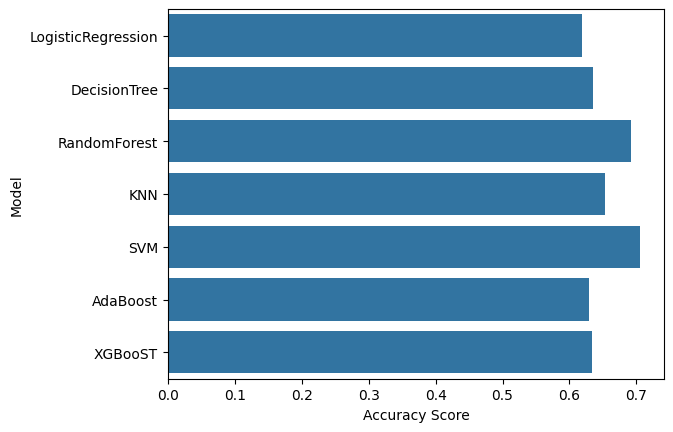

In [59]:
sns.barplot(x="Accuracy Score",y="Model",data=models)
models.sort_values(by="Accuracy Score",ascending=False)

C:\Users\shwet\AppData\Local\Temp\ipykernel_54840\1995939696.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




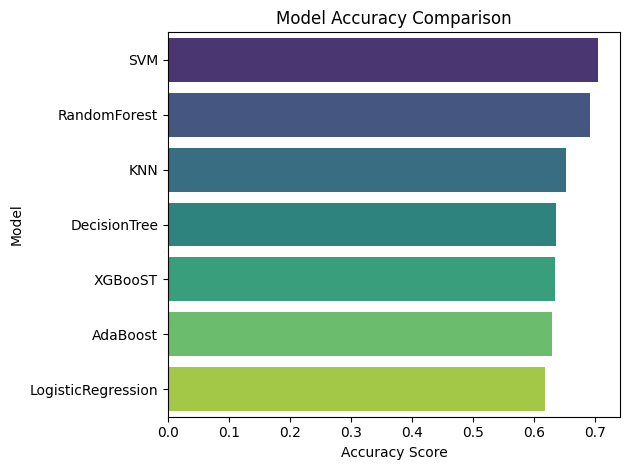

In [60]:

models_sorted = models.sort_values(by="Accuracy Score", ascending=False)
sns.barplot(
    x="Accuracy Score",
    y="Model",
    data=models_sorted,
    palette="viridis" 
)
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

In [2]:
import pickle

In [4]:
with open("model.pkl", "wb") as f:
    pickle.dump("model", f)

print("Model saved successfully as model.pkl")

Model saved successfully as model.pkl
